# Comparison of temperature as an active/passive scalar (figure 2)
One of the key conclusions of our work is that the thermal contribution to buoyancy plays no significant role in driving the flow, and therefore has little impact on the heat flux.
We test this here by comparing two simulations where temperature is active (that is, it contributes to the buoyancy term) with two simulations where it is passive (and therefore the density ratio $R_\rho=0$).

In [1]:
# Begin by loading the required pacakages
import h5py
import afidtools as afid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean
import seaborn as sns

In [2]:
# Use seaborn to make nice plots by default
sns.set_context("paper")
sns.set_style("ticks")
UTcols = [
    "#EBBDA9", "#CF0072", "#4F2D7F", "#002C5F", "#0094B3", "#63B1E5", "#00675A", "#3F9C35",
    "#887B1B", "#FED100", "#EC7A08", "#C60C30", "#822433", "#513C40", "#616365", "#ADAFAF"
]
sns.set_palette(UTcols[1:])
sns.color_palette(UTcols[1:])

[(0.8117647058823529, 0.0, 0.4470588235294118),
 (0.30980392156862746, 0.17647058823529413, 0.4980392156862745),
 (0.0, 0.17254901960784313, 0.37254901960784315),
 (0.0, 0.5803921568627451, 0.7019607843137254),
 (0.38823529411764707, 0.6941176470588235, 0.8980392156862745),
 (0.0, 0.403921568627451, 0.35294117647058826),
 (0.24705882352941178, 0.611764705882353, 0.20784313725490197),
 (0.5333333333333333, 0.4823529411764706, 0.10588235294117647),
 (0.996078431372549, 0.8196078431372549, 0.0),
 (0.9254901960784314, 0.47843137254901963, 0.03137254901960784),
 (0.7764705882352941, 0.047058823529411764, 0.18823529411764706),
 (0.5098039215686274, 0.1411764705882353, 0.2),
 (0.3176470588235294, 0.23529411764705882, 0.25098039215686274),
 (0.3803921568627451, 0.38823529411764707, 0.396078431372549),
 (0.6784313725490196, 0.6862745098039216, 0.6862745098039216)]

## Load in the plane-averaged profiles from the csv files
This data has been produced from the simulation output by the notebook `collect_profiles.ipynb`, and is loaded as a Pandas DataFrame

In [3]:
df = pd.read_csv("base_profiles.csv", index_col=0)
dfr = pd.read_csv("ref_profiles.csv", index_col=0)

We can preview the data by looking at the first 5 rows:

In [4]:
df.head()

,RaT,Pr,RaS,Sc,x,Tbar,σTbar,Tp2,σTp2,chiT,...,vzT,σvzT,vzbar,σvzbar,vzp2,σvzp2,Rρ,ν,κT,κS
0,-20000.0,1.0,10000000.0,10.0,0.000688,-0.496809,0.000200,0.000003,6.313947e-07,0.028058,...,-0.000008,0.000053,0.000016,0.000107,0.000006,0.000001,0.02,0.001,0.001,0.0001
1,-20000.0,1.0,10000000.0,10.0,0.002117,-0.490184,0.000614,0.000029,5.973520e-06,0.028057,...,-0.000024,0.000161,0.000050,0.000330,0.000053,0.000012,0.02,0.001,0.001,0.0001
2,-20000.0,1.0,10000000.0,10.0,0.003651,-0.483076,0.001057,0.000086,1.775150e-05,0.028047,...,-0.000041,0.000272,0.000085,0.000568,0.000153,0.000034,0.02,0.001,0.001,0.0001
3,-20000.0,1.0,10000000.0,10.0,0.005288,-0.475489,0.001531,0.000181,3.720458e-05,0.028018,...,-0.000058,0.000386,0.000124,0.000823,0.000310,0.000068,0.02,0.001,0.001,0.0001
4,-20000.0,1.0,10000000.0,10.0,0.007029,-0.467427,0.002032,0.000320,6.557969e-05,0.027955,...,-0.000076,0.000502,0.000164,0.001093,0.000528,0.000115,0.02,0.001,0.001,0.0001


## Define helper functions
Here, we define a few functions to help construct the figure

- `symplot` creates a plot of the desired variable `varname` on the axis `ax`. The mean profile is plotted as a solid line, and a translucent region is used to highlight the standard deviation in the time series
- `ax_plot_compare` selects the subset of the full data that we want to plot (i.e. restricting to simulations with certain physical parameters) and returns a list of lines created using `symplot`
- `anno_tl` and `anno_tr` simply add annotations to the (top left and top right) corners of the axis `ax`

In [5]:
def symplot(ax, varname, dframe):
    x = dframe["x"]
    mean = dframe[varname]
    std = dframe["σ"+varname]
    lstd = ax.fill_between(x, mean-std, mean+std, alpha=0.2)
    lme, = ax.plot(x, mean)
    return lstd, lme

In [6]:
Rlst = [0.02, 0, 0.02, 0] # List of density ratios
Slst = [10, 10, 100, 100] # List of Schmidt numbers
def ax_plot_compare(varname, ax):
    l = []
    for i in range(4):
        if "S" in varname:
            tdf = dfr[(dfr.Rρ==Rlst[i]) & (dfr.Sc==Slst[i]) & (dfr.Pr==1)]
        else:
            tdf = df[(df.Rρ==Rlst[i]) & (df.Sc==Slst[i]) & (df.Pr==1)]
        l.append(symplot(ax, varname, tdf))
    return l

In [7]:
def anno_tl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(
        str, (l, t), xytext=(3, -3),
        textcoords="offset points",
        ha="left", va="top"
    )
    return
def anno_tr(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(
        str, (r, t), xytext=(-3, -3),
        textcoords="offset points",
        ha="right", va="top"
    )
    return

## Create the figure!

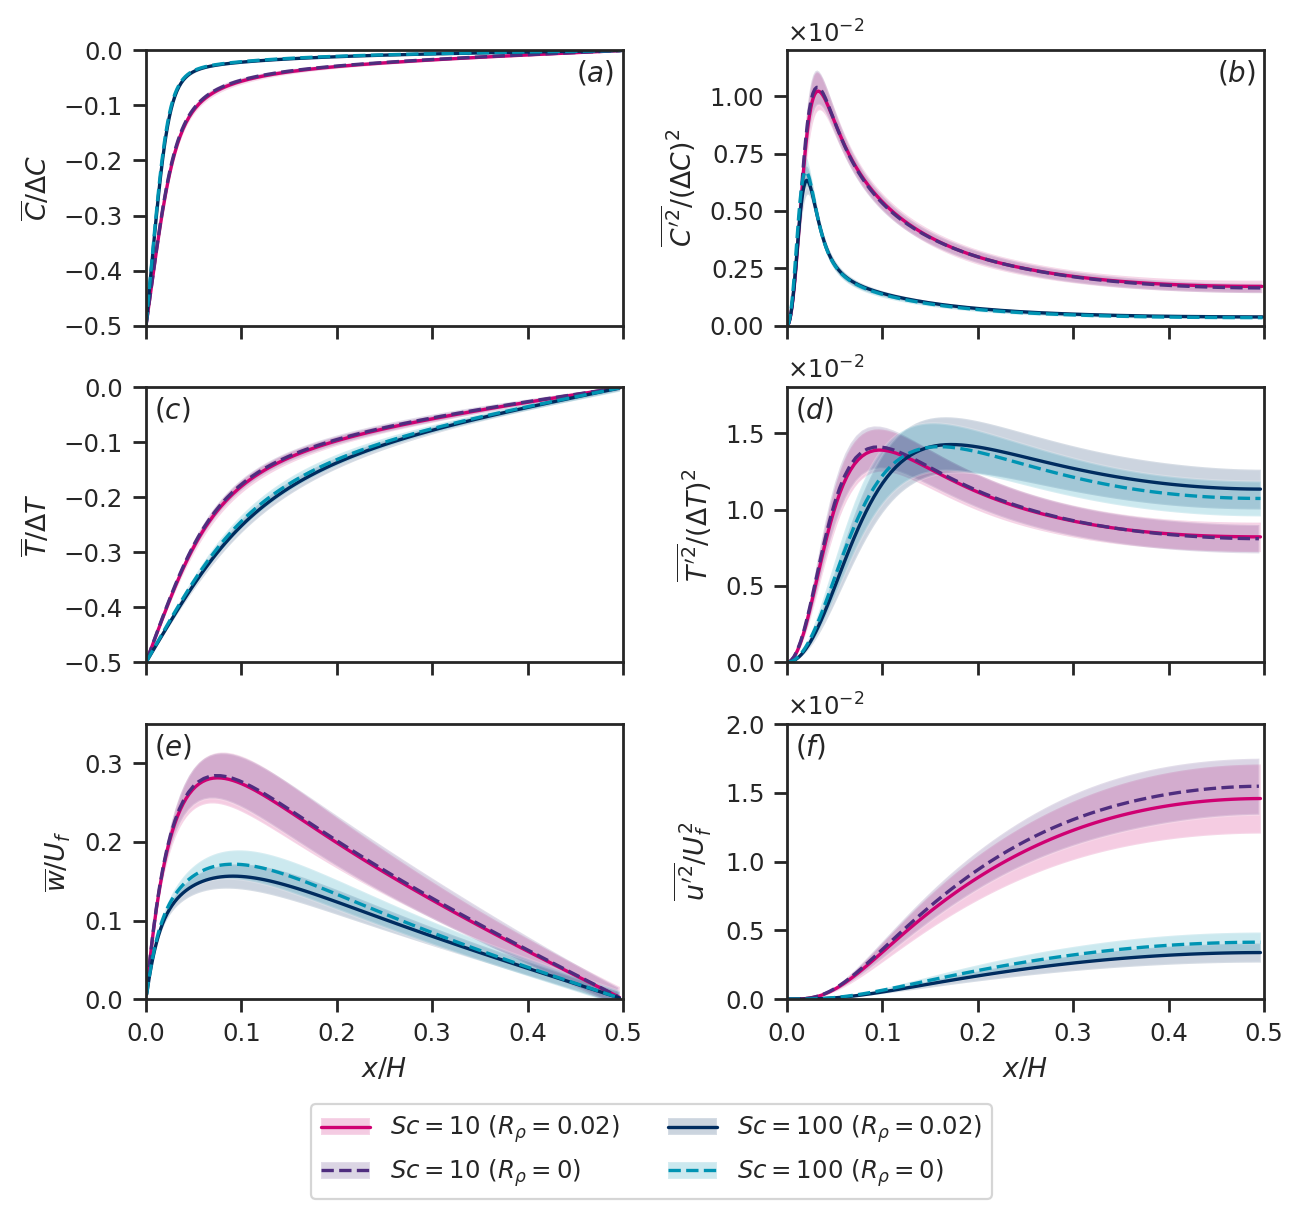

In [8]:
# Create figure with 6 subplots
fig, axs = plt.subplots(3,2, sharex=True, figsize=(6.4,5.4), constrained_layout=True, dpi=200)

# Create plots for each variable using the function defined above
l00 = ax_plot_compare("Sbar", axs[0,0])
l01 = ax_plot_compare("Sp2", axs[0,1])
l10 = ax_plot_compare("Tbar", axs[1,0])
l11 = ax_plot_compare("Tp2", axs[1,1])
l20 = ax_plot_compare("vybar", axs[2,0])
l21 = ax_plot_compare("vxp2", axs[2,1])

# Set passive cases to be dashed lines
for l in [l00, l01, l10, l11, l20, l21]:
    l[-1][1].set_linestyle('dashed')
    l[1][1].set_linestyle('dashed')

# Set axis limits
axs[0,0].set_xlim([0,0.5])
axs[0,0].set_ylim([-0.5,0])
axs[1,0].set_ylim([-0.5,0])
axs[0,1].set_ylim([0,1.2e-2])
axs[1,1].set_ylim([0,1.8e-2])
axs[2,0].set_ylim([0,0.35])
axs[2,1].set_ylim([0,0.02])

# Add legend below axes
fig.legend(
    l00,
    ["$Sc=10 \ (R_\\rho=0.02)$", "$Sc=10 \ (R_\\rho=0)$",
     "$Sc=100 \ (R_\\rho=0.02)$", "$Sc=100 \ (R_\\rho=0)$"],
    ncol=2, loc=9, bbox_to_anchor=(0.5,0)
)

# Set axis labels
for ax in axs[2,:]:
    ax.set_xlabel("$x/H$")
axs[0,0].set_ylabel("$\\overline{C}/\Delta C$")
axs[0,1].set_ylabel("$\\overline{C'^2}/(\Delta C)^2$")
axs[1,0].set_ylabel("$\\overline{T}/\Delta T$")
axs[1,1].set_ylabel("$\\overline{T'^2}/(\Delta T)^2$")
axs[2,0].set_ylabel("$\\overline{w}/U_f$")
axs[2,1].set_ylabel("$\\overline{u'^2}/U_f^2$")

# Use scientific notation for number format in second column
for ax in axs[:,1]:
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

# Add panel labels
anno_tr(axs[0,0],"$(a)$")
anno_tr(axs[0,1],"$(b)$")
anno_tl(axs[1,0],"$(c)$")
anno_tl(axs[1,1],"$(d)$")
anno_tl(axs[2,0],"$(e)$")
anno_tl(axs[2,1],"$(f)$")

# Save figure to file
# fig.savefig("passive_comparison.svg", bbox_inches='tight', transparent=True)

plt.show()